In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
plt.rc('axes', unicode_minus=False)

# 🚩Goal : 새로운 육류 상품 데이터의 탄소배출량 예측하기
※데이터 출처 : https://www.kaggle.com/datasets/amandaroseknudsen/gleamlivestockemissions

# 🔎Inspiration
- 가장 많은 온실가스를 배출하는 지역/가축/생산시스템/상품은?
> 각 특성의 범주에서 온실가스를 많이 배출하는 것이 무엇인지 확인
- 총 상품 생산량이 가장 많은 지역/가축/상품은?
> 같은 양의 단백질을 만들어내기위해 각각의 칼럼에서 가장 많은 생산량이 요구되는 것이 무엇인지 파악하기 위함.
- 생산량 대비 온실가스 배출 강도가 가장 높은 지역/가축/생산시스템/상품은?
> 온실가스 배출 강도가 생산량에 비례하여 높아지는지 확인하기 위함.

# 🎨Data Description
- Region : 생산지
- Animal species : 가축 종류
- Production system : 사육 방식
- Commodity : 상품(가축이 어떤 상품으로 만들어지는지)
- Production(kg protein) : 총 생산량(1kg의 단백질을 만들기 위해 필요한 생산량)
- Total GHG emissions(kg CO2e) : 총 온실가스 배출량
- Emission Intensity(kg CO2e per kg protein) : 온실가스 배출 강도 
>배출강도 = 온실가스 배출량/생산량

In [ ]:
import pandas as pd
import numpy as np

from google.colab import files

files.upload()

Saving GLEAM_LivestockEmissions.csv to GLEAM_LivestockEmissions (3).csv


{'GLEAM_LivestockEmissions.csv': b'\xef\xbb\xbfRegion,Animal species,Production system,Commodity,Emission Intensity (kg CO2e per kg protein),Production (kg protein),Total GHG emissions (kg CO2e),Total CO2 emissions (kg CO2e),Total CH4 emissions (kg CO2e),Total N2O emissions (kg CO2e),"Feed, CO2 (kg CO2e)","Feed, CH4 (kg CO2e)","Feed: fertilizer & crop residues, N2O (kg CO2e)","Feed: applied & deposited manure, N2O (kg CO2e)","LUC: soy & palm, CO2 (kg CO2e)","LUC: pasture expansion, CO2 (kg CO2e)","Enteric fermentation, CH4 (kg CO2e)","Manure management, CH4 (kg CO2e)","Manure management, N2O (kg CO2e)","Direct energy, CO2 (kg CO2e)","Indirect energy, CO2 (kg CO2e)","Postfarm, CO2 (kg CO2e)"\r\nGlobal,Cattle,Aggregated,Aggregated,160.3,29163104088.00,4674630004526.00,944929928440.00,2648727469346.00,1080972606740.00,353472898877.00,,174073200019.00,741986436762.00,46879544228.00,387006214286.00,2509275304012.00,139452165333.00,164912969959.00,42155419009.00,15856531896.00,99559320145.00

In [ ]:
original_df = pd.read_csv('GLEAM_LivestockEmissions.csv')
df_gleam = original_df[['Region', 'Animal species', 'Production system', 'Commodity', 'Production (kg protein)', 'Total GHG emissions (kg CO2e)', 'Emission Intensity (kg CO2e per kg protein)']]
df_gleam.head()

,Region,Animal species,Production system,Commodity,Production (kg protein),Total GHG emissions (kg CO2e),Emission Intensity (kg CO2e per kg protein)
0,Global,Cattle,Aggregated,Aggregated,2.916310e+10,4.674630e+12,160.3
1,Global,Cattle,Aggregated,Milk,1.888089e+10,1.637519e+12,86.7
2,Global,Cattle,Aggregated,Meat,1.028222e+10,3.037111e+12,295.4
3,Global,Cattle,Grassland systems,Aggregated,1.033817e+10,2.133054e+12,206.3
4,Global,Cattle,Grassland systems,Milk,6.940654e+09,6.592844e+11,95.0


In [ ]:
# !pip install pandas-profiling==3.1.0

In [ ]:
# from pandas_profiling import ProfileReport
# profile = ProfileReport(df_gleam, minimal=True).to_notebook_iframe()

In [ ]:
# 데이터 확인
df_gleam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 7 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Region                                       583 non-null    object 
 1   Animal species                               583 non-null    object 
 2   Production system                            583 non-null    object 
 3   Commodity                                    583 non-null    object 
 4   Production (kg protein)                      543 non-null    float64
 5   Total GHG emissions (kg CO2e)                543 non-null    float64
 6   Emission Intensity (kg CO2e per kg protein)  583 non-null    float64
dtypes: float64(3), object(4)
memory usage: 32.0+ KB


In [ ]:
# 중복값 확인
df_gleam.duplicated().sum()

0

In [ ]:
df_gleam[df_gleam.duplicated()]

,Region,Animal species,Production system,Commodity,Production (kg protein),Total GHG emissions (kg CO2e),Emission Intensity (kg CO2e per kg protein)


In [ ]:
# 중복값 상세 확인
df_gleam[(df_gleam['Region']=='North America') & (df_gleam['Animal species']=='Pigs')]
#df_gleam.query("Region == 'North America' & `Animal species` == 'Pigs'")

,Region,Animal species,Production system,Commodity,Production (kg protein),Total GHG emissions (kg CO2e),Emission Intensity (kg CO2e per kg protein)
303,North America,Pigs,Aggregated,Meat,1.742059e+09,6.362182e+10,36.5
304,North America,Pigs,Backyard systems,Meat,NaN,NaN,0.0
305,North America,Pigs,Intermediate systems,Meat,NaN,NaN,0.0
306,North America,Pigs,Industrial systems,Meat,1.742059e+09,6.362182e+10,36.5


In [ ]:
# 결측치 확인
df_gleam.isnull().sum()

Region                                          0
Animal species                                  0
Production system                               0
Commodity                                       0
Production (kg protein)                        40
Total GHG emissions (kg CO2e)                  40
Emission Intensity (kg CO2e per kg protein)     0
dtype: int64

In [ ]:
# Production칼럼과 Total GHG emissions칼럼의 결측치 확인
null_df = df_gleam[df_gleam['Production (kg protein)'].isnull() & df_gleam['Total GHG emissions (kg CO2e)'].isnull()]

=> 두 칼럼의 결측치가 없는 행이 동일함.

- 다른 지역에서 위 결측치와 Animal species, Production system,	Commodity칼럼이 전부 일치하는 행이 있는 경우,

 해당 지역의 Production칼럼과 Total GHG emissions칼럼의 값으로 결측치 채우기.

### Region칼럼의 Global값 의미 확인

In [ ]:
check = df_gleam[~df_gleam.Region.str.contains('Global')] #glbal은 다른 지역의 전체 합계를 넣어놓은 행인가 아니면 다른 행의 합계와 상관없이 전세계 평균인가??
check

,Region,Animal species,Production system,Commodity,Production (kg protein),Total GHG emissions (kg CO2e),Emission Intensity (kg CO2e per kg protein)
53,East Asia and Southeast Asia,Cattle,Aggregated,Aggregated,2.987340e+09,5.508116e+11,184.4
54,East Asia and Southeast Asia,Cattle,Aggregated,Milk,1.735258e+09,1.352452e+11,77.9
55,East Asia and Southeast Asia,Cattle,Aggregated,Meat,1.252082e+09,4.155664e+11,331.9
56,East Asia and Southeast Asia,Cattle,Grassland systems,Aggregated,1.054486e+09,1.973133e+11,187.1
57,East Asia and Southeast Asia,Cattle,Grassland systems,Milk,7.672948e+08,5.840863e+10,76.1
...,...,...,...,...,...,...,...
578,Western Europe,Chicken,Layers,Aggregated,6.025046e+08,1.323780e+10,22.0
579,Western Europe,Chicken,Layers,Eggs,5.681959e+08,1.243977e+10,21.9
580,Western Europe,Chicken,Layers,Meat,3.430870e+07,7.980299e+08,23.3
581,Western Europe,Chicken,Broilers,Aggregated,9.068378e+08,2.843091e+10,31.4


In [ ]:
df_gleam[df_gleam.Region.str.contains('Global')].head()

,Region,Animal species,Production system,Commodity,Production (kg protein),Total GHG emissions (kg CO2e),Emission Intensity (kg CO2e per kg protein)
0,Global,Cattle,Aggregated,Aggregated,2.916310e+10,4.674630e+12,160.3
1,Global,Cattle,Aggregated,Milk,1.888089e+10,1.637519e+12,86.7
2,Global,Cattle,Aggregated,Meat,1.028222e+10,3.037111e+12,295.4
3,Global,Cattle,Grassland systems,Aggregated,1.033817e+10,2.133054e+12,206.3
4,Global,Cattle,Grassland systems,Milk,6.940654e+09,6.592844e+11,95.0


In [ ]:
# check.query('`Animal species` == "Cattle" & Commodity == "Milk"')['Total GHG emissions (kg CO2e)'].sum()
check[check['Animal species'] == 'Cattle']['Total GHG emissions (kg CO2e)'].sum()
# check[check['Animal species'] == 'Cattle']

18698520018100.0

In [ ]:
check.Region.unique()

array(['East Asia and Southeast Asia', 'Eastern Europe',
       'Latin America and the Caribbean', 'Near East and North Africa',
       'North America', 'Oceania', 'Russian Federation', 'South Asia',
       'Sub-Saharan Africa', 'Western Europe'], dtype=object)

=> 글로벌 평균인듯. 이 데이터셋에 있는 지역의 전체 합계나 평균과는 일치하지 않으므로 놔두기.

### Production system컬럼의 Aggregate값 행 삭제(..?)
-> 삭제하면 데이터가 너무 작아짐... 삭제하지 말자.

In [ ]:
# check[check['Production system'] == 'Aggregated']
notAgg = check[~check['Production system'].str.contains('Aggregated') & ~check['Commodity'].str.contains('Aggregated')]
notAgg

,Region,Animal species,Production system,Commodity,Production (kg protein),Total GHG emissions (kg CO2e),Emission Intensity (kg CO2e per kg protein)
57,East Asia and Southeast Asia,Cattle,Grassland systems,Milk,767294817.0,5.840863e+10,76.1
58,East Asia and Southeast Asia,Cattle,Grassland systems,Meat,287191437.0,1.389047e+11,483.7
60,East Asia and Southeast Asia,Cattle,Mixed systems,Milk,967963031.0,7.683659e+10,79.4
61,East Asia and Southeast Asia,Cattle,Mixed systems,Meat,720039130.0,2.425695e+11,336.9
63,East Asia and Southeast Asia,Cattle,Feedlots,Meat,244851714.0,3.409228e+10,139.2
...,...,...,...,...,...,...,...
576,Western Europe,Chicken,Backyard systems,Eggs,8591687.0,9.318330e+07,10.8
577,Western Europe,Chicken,Backyard systems,Meat,2149731.0,2.983048e+07,13.9
579,Western Europe,Chicken,Layers,Eggs,568195891.0,1.243977e+10,21.9
580,Western Europe,Chicken,Layers,Meat,34308705.0,7.980299e+08,23.3


### 결측치 대체->삭제

In [ ]:
# Production칼럼과 Total GHG emissions칼럼의 결측치를, 결측치가 없는 다른 지역의 가축종류와 사육시스템이 일치하는 행들의 평균값으로 대체해줄까?
null_df.head()

,Region,Animal species,Production system,Commodity,Production (kg protein),Total GHG emissions (kg CO2e),Emission Intensity (kg CO2e per kg protein)
115,Eastern Europe,Cattle,Feedlots,Aggregated,NaN,NaN,0.0
116,Eastern Europe,Cattle,Feedlots,Meat,NaN,NaN,0.0
221,Near East and North Africa,Cattle,Feedlots,Aggregated,NaN,NaN,0.0
222,Near East and North Africa,Cattle,Feedlots,Meat,NaN,NaN,0.0
286,North America,Sheep,Aggregated,Milk,NaN,NaN,0.0


In [ ]:
df_gleam.query('`Animal species`=="Cattle" & `Production system`=="Feedlots" & Commodity=="Aggregated"')

,Region,Animal species,Production system,Commodity,Production (kg protein),Total GHG emissions (kg CO2e),Emission Intensity (kg CO2e per kg protein)
9,Global,Cattle,Feedlots,Aggregated,1.518764e+09,1.415279e+11,93.2
62,East Asia and Southeast Asia,Cattle,Feedlots,Aggregated,2.448517e+08,3.409228e+10,139.2
115,Eastern Europe,Cattle,Feedlots,Aggregated,NaN,NaN,0.0
168,Latin America and the Caribbean,Cattle,Feedlots,Aggregated,1.587227e+08,2.188297e+10,137.9
221,Near East and North Africa,Cattle,Feedlots,Aggregated,NaN,NaN,0.0
274,North America,Cattle,Feedlots,Aggregated,1.054412e+09,7.802688e+10,74.0
327,Oceania,Cattle,Feedlots,Aggregated,3.921703e+07,4.696080e+09,119.7
380,Russian Federation,Cattle,Feedlots,Aggregated,NaN,NaN,0.0
433,South Asia,Cattle,Feedlots,Aggregated,NaN,NaN,0.0
486,Sub-Saharan Africa,Cattle,Feedlots,Aggregated,1.578646e+07,2.357287e+09,149.3


In [ ]:
df_gleam.groupby(['Animal species', 'Production system', 'Commodity']).get_group(('Cattle', 'Feedlots', 'Aggregated'))[['Production (kg protein)', 'Total GHG emissions (kg CO2e)', 'Emission Intensity (kg CO2e per kg protein)']].sum()

Production (kg protein)                        3.037528e+09
Total GHG emissions (kg CO2e)                  2.830559e+11
Emission Intensity (kg CO2e per kg protein)    7.951000e+02
dtype: float64

In [ ]:
# 시간없으니까 근접한 이웃값으로 결측치 채우자
# from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=2, weights='distance')
# imputer.fit_transform(df_gleam)


#from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer

# imputer = IterativeImputer(random_state=1)
# imputer.fit_transform(df_gleam['Production (kg protein)'])
# df_gleam

In [ ]:
# 최빈값으로 결측치 대체
# df_gleam.fillna({'Production (kg protein)':df_gleam['Production (kg protein)'].mode()[0], 'Total GHG emissions (kg CO2e)':df_gleam['Total GHG emissions (kg CO2e)'].mode()[0]}, inplace=True)

In [ ]:
# 배출강도 칼럼의 0값을 평균값으로 대체
# df_gleam = df_gleam.replace(0,df_gleam['Emission Intensity (kg CO2e per kg protein)'].mean())

In [ ]:
# 확인
# df_gleam.query('`Animal species`=="Cattle" & `Production system`=="Feedlots" & Commodity=="Aggregated"')

In [ ]:
df_gleam = df_gleam.dropna()

In [ ]:
df_gleam.isnull().sum()

Region                                         0
Animal species                                 0
Production system                              0
Commodity                                      0
Production (kg protein)                        0
Total GHG emissions (kg CO2e)                  0
Emission Intensity (kg CO2e per kg protein)    0
dtype: int64

In [ ]:
df_gleam.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 543 entries, 0 to 582
Data columns (total 7 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Region                                       543 non-null    object 
 1   Animal species                               543 non-null    object 
 2   Production system                            543 non-null    object 
 3   Commodity                                    543 non-null    object 
 4   Production (kg protein)                      543 non-null    float64
 5   Total GHG emissions (kg CO2e)                543 non-null    float64
 6   Emission Intensity (kg CO2e per kg protein)  543 non-null    float64
dtypes: float64(3), object(4)
memory usage: 33.9+ KB


### 이상치 확인

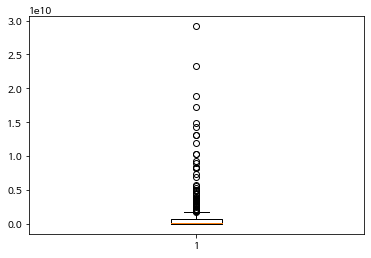

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.boxplot(df_gleam['Production (kg protein)'])
plt.show()

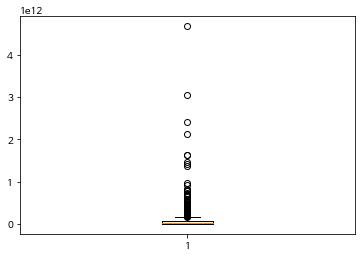

In [ ]:
plt.boxplot(df_gleam['Total GHG emissions (kg CO2e)'])
plt.show()

In [ ]:
df_gleam.describe()

,Production (kg protein),Total GHG emissions (kg CO2e),Emission Intensity (kg CO2e per kg protein)
count,5.430000e+02,5.430000e+02,543.000000
mean,9.847297e+08,1.047787e+11,131.508471
std,2.664848e+09,3.327099e+11,110.582472
min,7.160000e+02,1.635180e+05,10.800000
25%,2.109760e+07,1.896682e+09,48.950000
50%,1.302244e+08,1.376529e+10,102.100000
75%,7.096944e+08,6.712900e+10,186.150000
max,2.916310e+10,4.674630e+12,643.800000


### 지역 명칭 한글로 변경

In [ ]:
df_gleam['Region'].replace({'Global':'글로벌', 'East Asia and Southeast Asia':'동남아시아', 'Latin America and the Caribbean':'중남미', 'Western Europe':'서유럽', 
                       'Eastern Europe':'동유럽', 'Near East and North Africa':'동북아프리카', 'South Asia':'남아시아', 'Russian Federation':'러시아연방',
                       'North America':'북미', 'Sub-Saharan Africa':'사하라이남', 'Oceania':'오세아니아'}, inplace=True)
df_gleam['Region'].unique()

array(['글로벌', '동남아시아', '동유럽', '중남미', '동북아프리카', '북미', '오세아니아', '러시아연방',
       '남아시아', '사하라이남', '서유럽'], dtype=object)

### 가설 시각화

### 1. 가장 많은 온실가스를 배출하는 지역/가축/생산시스템/상품은?

In [ ]:
# 가축별 데이터 개수 확인
df_gleam['Animal species'].value_counts()

Chicken      118
Cattle       113
Goats         99
Sheep         93
Buffaloes     78
Pigs          42
Name: Animal species, dtype: int64

In [ ]:
## 가장 많은 양의 온실가스를 배출하는 가축(단순합계)
# df_gleam.groupby('Animal species')['Total GHG emissions (kg CO2e)'].max()
# df_gleam[['Animal species', 'Total GHG emissions (kg CO2e)']].groupby('Animal species').agg(['mean','max'])
list_sum = df_gleam.groupby('Animal species')[['Total GHG emissions (kg CO2e)']].sum().reset_index().sort_values(by='Total GHG emissions (kg CO2e)', ascending=False)
list_sum

,Animal species,Total GHG emissions (kg CO2e)
1,Cattle,3.739704e+13
2,Chicken,6.318074e+12
0,Buffaloes,5.723084e+12
4,Pigs,3.277259e+12
5,Sheep,2.414827e+12
3,Goats,1.764572e+12


In [ ]:
## 평균적으로 가장 많은 양의 온실가스를 배출하는 가축
list1_animal = df_gleam[['Animal species', 'Total GHG emissions (kg CO2e)']].groupby('Animal species').mean().reset_index().sort_values(by='Total GHG emissions (kg CO2e)', ascending=False)
list1_animal

,Animal species,Total GHG emissions (kg CO2e)
1,Cattle,3.309473e+11
4,Pigs,7.802997e+10
0,Buffaloes,7.337287e+10
2,Chicken,5.354300e+10
5,Sheep,2.596589e+10
3,Goats,1.782396e+10


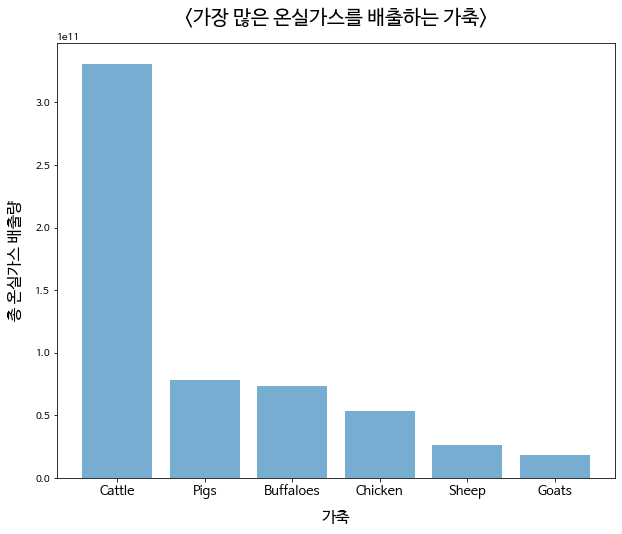

In [ ]:
x = list1_animal['Animal species']
y = list1_animal['Total GHG emissions (kg CO2e)']
plt.figure(figsize=(10,8))
plt.bar(x, y, alpha=0.6)
plt.xticks(fontsize=13)
plt.title('<가장 많은 온실가스를 배출하는 가축>', fontsize=20, pad=20)
plt.xlabel('가축', labelpad=10, fontsize=16)
plt.ylabel('총 온실가스 배출량', labelpad=10, fontsize=16)
plt.show();

In [ ]:
# 지역 개수 비교
df_gleam['Region'].value_counts()

글로벌       53
동남아시아     53
중남미       53
서유럽       53
동유럽       51
동북아프리카    51
남아시아      51
러시아연방     48
북미        45
사하라이남     44
오세아니아     41
Name: Region, dtype: int64

In [ ]:
# (Gloabl제외)가장 많은 온실가스를 배출하는 지역
list1_region = df_gleam.groupby('Region')[['Total GHG emissions (kg CO2e)']].mean().reset_index().sort_values(by='Total GHG emissions (kg CO2e)', ascending=False)[1:]
list1_region

,Region,Total GHG emissions (kg CO2e)
10,중남미,1.395487e+11
1,남아시아,1.178343e+11
2,동남아시아,1.016071e+11
6,북미,5.076989e+10
3,동북아프리카,4.531271e+10
8,서유럽,3.806104e+10
7,사하라이남,3.724361e+10
9,오세아니아,1.502545e+10
4,동유럽,8.717978e+09
5,러시아연방,7.175271e+09


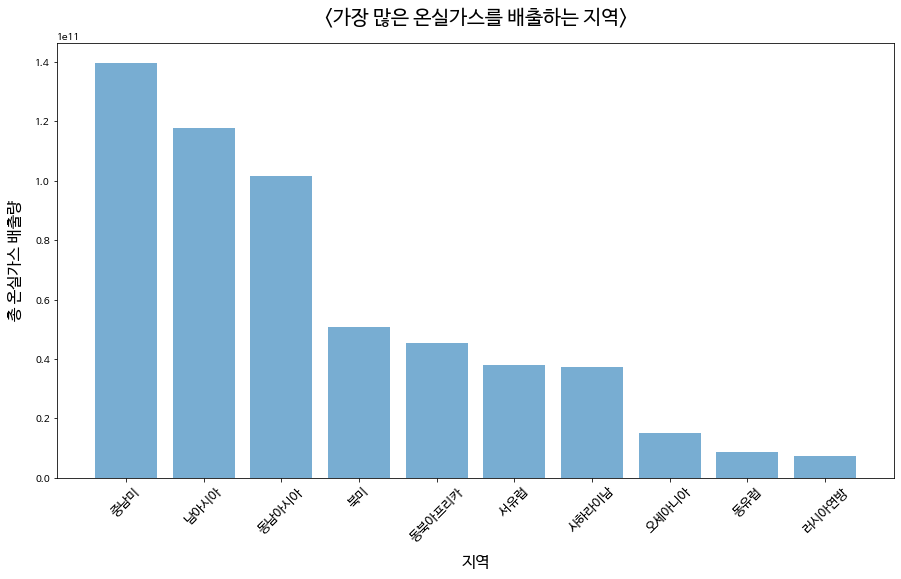

In [ ]:
x = list1_region['Region']
y = list1_region['Total GHG emissions (kg CO2e)']
plt.figure(figsize=(15,8))
plt.bar(x, y, alpha=0.6)
plt.title('<가장 많은 온실가스를 배출하는 지역>', fontsize=20, pad=20)
plt.xlabel('지역', labelpad=10, fontsize=16)
plt.ylabel('총 온실가스 배출량', labelpad=10, fontsize=16)
plt.xticks(rotation=45, fontsize=13)
plt.show();

In [ ]:
# 생산시스템 카테고리별 개수
df_gleam['Production system'].value_counts()

Aggregated              167
Grassland systems       123
Mixed systems           123
Backyard systems         40
Layers                   33
Broilers                 22
Feedlots                 14
Industrial systems       11
Intermediate systems     10
Name: Production system, dtype: int64

In [ ]:
## 가장 많은 온실가스를 배출하는 가축-생산시스템
list1_system = df_gleam.groupby(['Animal species', 'Production system'])[['Total GHG emissions (kg CO2e)']].mean()\
.reset_index().sort_values(by='Total GHG emissions (kg CO2e)', ascending=False)

drop_agg = list1_system[list1_system['Production system'].str.contains('Aggregated')].index
list1_system.drop(drop_agg, inplace=True)

list1_system[:3]

,Animal species,Production system,Total GHG emissions (kg CO2e)
6,Cattle,Mixed systems,2.909149e+11
5,Cattle,Grassland systems,2.585520e+11
2,Buffaloes,Mixed systems,9.030326e+10


In [ ]:
# 상품 카테고리별 개수
df_gleam['Commodity'].value_counts()

Meat          218
Aggregated    176
Milk          117
Eggs           32
Name: Commodity, dtype: int64

In [ ]:
## 가장 많은 온실가스를 배출하는 가축-상품
list1_commodity = df_gleam.groupby(['Animal species', 'Commodity'])[['Total GHG emissions (kg CO2e)']].mean()\
.reset_index().sort_values(by='Total GHG emissions (kg CO2e)', ascending=False)

drop_agg = list1_commodity[list1_commodity['Commodity'].str.contains('Aggregated')].index
list1_commodity.drop(drop_agg, inplace=True)

list1_commodity[:3]

,Animal species,Commodity,Total GHG emissions (kg CO2e)
4,Cattle,Meat,3.037111e+11
5,Cattle,Milk,1.984872e+11
2,Buffaloes,Milk,7.892331e+10


### 2. 총 생산량이 가장 많은 지역/가축/상품은?

In [ ]:
## 총 생산량이 가장 많은 가축
list2_animal = df_gleam[['Animal species', 'Production (kg protein)']].groupby('Animal species').sum().reset_index().sort_values(by='Production (kg protein)', ascending=False)
list2_animal

,Animal species,Production (kg protein)
1,Cattle,2.333048e+11
2,Chicken,1.869126e+11
4,Pigs,5.953953e+10
0,Buffaloes,3.190316e+10
5,Sheep,1.277411e+10
3,Goats,1.027396e+10


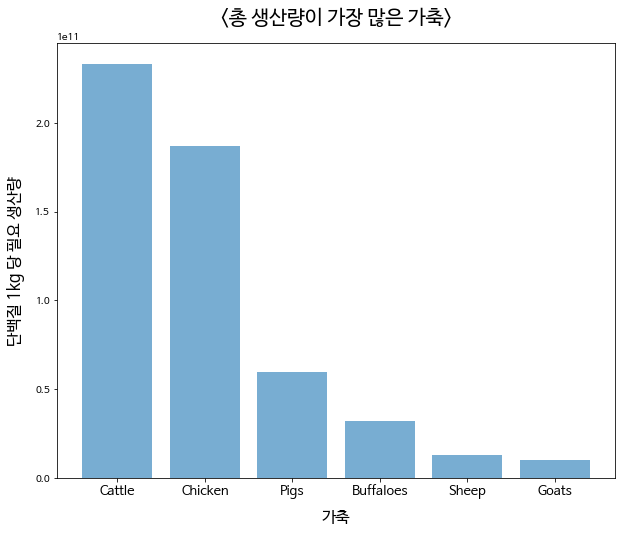

In [ ]:
x = list2_animal['Animal species']
y = list2_animal['Production (kg protein)']
plt.figure(figsize=(10,8))
plt.bar(x, y, alpha=0.6)
plt.xticks(fontsize=13)
plt.title('<총 생산량이 가장 많은 가축>', fontsize=20, pad=20)
plt.xlabel('가축', labelpad=10, fontsize=16)
plt.ylabel('단백질 1kg 당 필요 생산량', labelpad=10, fontsize=16)
plt.show();

In [ ]:
## 총 생산량이 가장 많은 지역
list2_region = df_gleam.groupby('Region')[['Production (kg protein)']].sum().reset_index().sort_values(by='Production (kg protein)', ascending=False)[1:]
list2_region

,Region,Production (kg protein)
2,동남아시아,6.308185e+10
10,중남미,4.583888e+10
1,남아시아,3.868346e+10
6,북미,3.684908e+10
8,서유럽,3.563813e+10
3,동북아프리카,1.579427e+10
4,동유럽,9.579636e+09
7,사하라이남,8.149973e+09
5,러시아연방,7.451267e+09
9,오세아니아,6.287573e+09


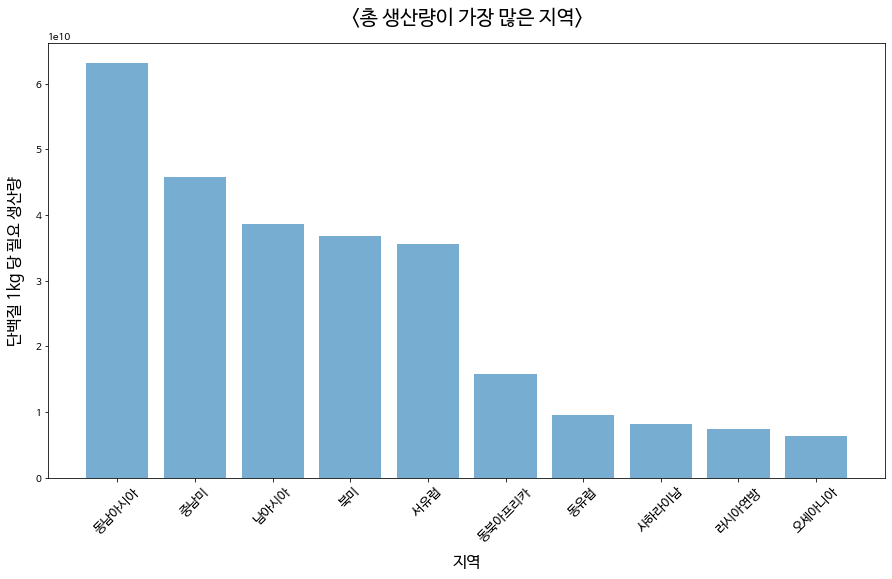

In [ ]:
x = list2_region['Region']
y = list2_region['Production (kg protein)']
plt.figure(figsize=(15,8))
plt.bar(x, y, alpha=0.6)
plt.title('<총 생산량이 가장 많은 지역>', fontsize=20, pad=20)
plt.xlabel('지역', labelpad=10, fontsize=16)
plt.ylabel('단백질 1kg 당 필요 생산량', labelpad=10, fontsize=16)
plt.xticks(rotation=45, fontsize=13)
plt.show();

In [ ]:
# ## 총 생산량이 가장 많은 상품
# list2_commodity = df_gleam.groupby('Commodity')[['Production (kg protein)']].sum().reset_index().sort_values(by='Production (kg protein)', ascending=False)[1:]
# list2_commodity

In [ ]:
# x = list2_commodity['Commodity']
# y = list2_commodity['Production (kg protein)']
# plt.figure(figsize=(8,8))
# plt.bar(x, y, alpha=0.6)
# plt.title('<총 생산량이 가장 많은 상품>', fontsize=20, pad=20)
# plt.xlabel('상품', labelpad=10, fontsize=16)
# plt.ylabel('단백질 1kg 당 필요 생산량', labelpad=10, fontsize=16)
# plt.xticks(fontsize=13)
# plt.show();

In [ ]:
## 총 생산량이 가장 많은 가축-생산시스템
list2_ani_sys = df_gleam.groupby(['Animal species','Production system'])[['Production (kg protein)']].sum().reset_index().sort_values(by='Production (kg protein)', ascending=False)
# (Production system의 집계값 제외)
drop_agg = list2_ani_sys[list2_ani_sys['Production system'].str.contains('Aggregated')].index
list2_ani_sys.drop(drop_agg, inplace=True)

list2_ani_sys[:3]

,Animal species,Production system,Production (kg protein)
6,Cattle,Mixed systems,6.922466e+10
9,Chicken,Broilers,5.273047e+10
5,Cattle,Grassland systems,4.135270e+10


In [ ]:
## 총 생산량이 가장 많은 가축-상품
list2_ani_comm = df_gleam.groupby(['Animal species','Commodity'])[['Production (kg protein)']].sum().reset_index().sort_values(by='Production (kg protein)', ascending=False)
list2_ani_comm[2:5]

,Animal species,Commodity,Production (kg protein)
5,Cattle,Milk,7.552354e+10
12,Pigs,Meat,5.953953e+10
8,Chicken,Meat,5.734886e+10


### 3. 생산량 대비 온실가스 배출 강도가 가장 높은 지역/가축/생산시스템/상품은?

In [ ]:
## 생산량 대비 온실가스 배출강도가 가장 높은 가축
list3_animal = df_gleam.groupby('Animal species')[['Emission Intensity (kg CO2e per kg protein)']].sum().reset_index().sort_values(by='Emission Intensity (kg CO2e per kg protein)', ascending=False)
list3_animal

,Animal species,Emission Intensity (kg CO2e per kg protein)
1,Cattle,19305.8
5,Sheep,16714.3
0,Buffaloes,15669.4
3,Goats,13954.9
2,Chicken,3401.2
4,Pigs,2363.5


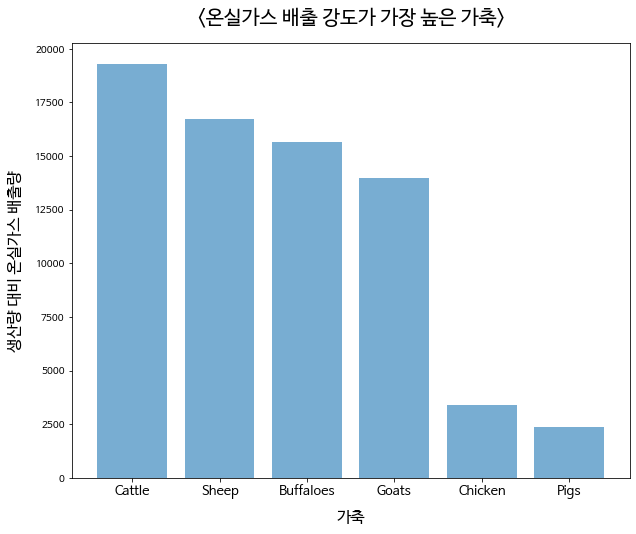

In [ ]:
x = list3_animal['Animal species']
y = list3_animal['Emission Intensity (kg CO2e per kg protein)']
plt.figure(figsize=(10,8))
plt.bar(x, y, alpha=0.6)
plt.xticks(fontsize=13)
plt.title('<온실가스 배출 강도가 가장 높은 가축>', fontsize=20, pad=20)
plt.xlabel('가축', labelpad=10, fontsize=16)
plt.ylabel('생산량 대비 온실가스 배출량', labelpad=10, fontsize=16)
plt.show();

In [ ]:
## 생산량 대비 온실가스 배출강도가 가장 높은 지역
list3_region = df_gleam.groupby('Region')[['Emission Intensity (kg CO2e per kg protein)']].sum().reset_index().sort_values(by='Emission Intensity (kg CO2e per kg protein)', ascending=False).drop(index=0)
list3_region

,Region,Emission Intensity (kg CO2e per kg protein)
2,동남아시아,9676.0
3,동북아프리카,9296.3
1,남아시아,9278.5
10,중남미,8573.9
7,사하라이남,7067.5
5,러시아연방,4323.6
9,오세아니아,4164.9
6,북미,4004.7
4,동유럽,3585.7
8,서유럽,3396.9


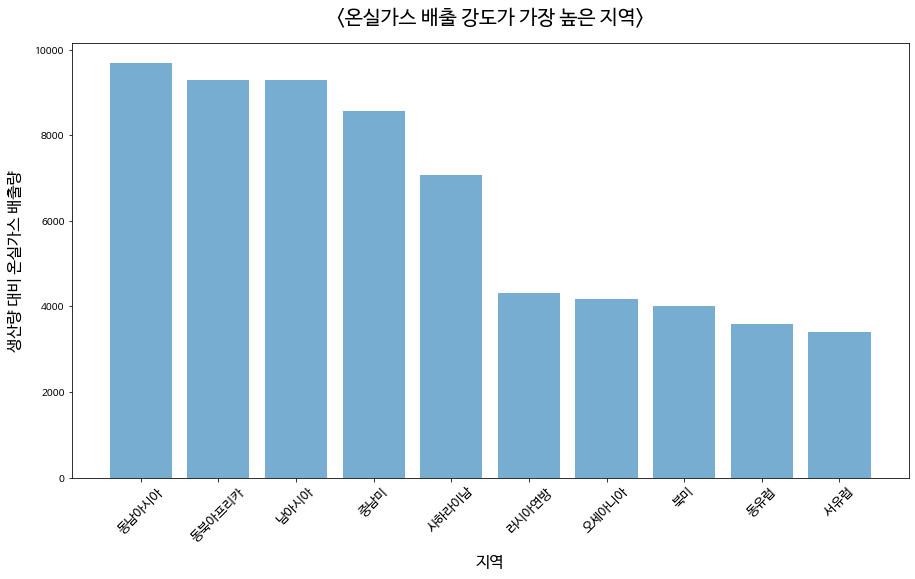

In [ ]:
x = list3_region['Region']
y = list3_region['Emission Intensity (kg CO2e per kg protein)']
plt.figure(figsize=(15,8))
plt.bar(x, y, alpha=0.6)
plt.title('<온실가스 배출 강도가 가장 높은 지역>', fontsize=20, pad=20)
plt.xlabel('지역', labelpad=10, fontsize=16)
plt.ylabel('생산량 대비 온실가스 배출량', labelpad=10, fontsize=16)
plt.xticks(rotation=45, fontsize=13)
plt.show();

In [ ]:
## 온실가스 배출 강도가 가장 높은 가축-생산시스템
list3_system = df_gleam.groupby(['Animal species','Production system'])[['Emission Intensity (kg CO2e per kg protein)']].sum().reset_index().sort_values(by='Emission Intensity (kg CO2e per kg protein)', ascending=False)

drop_agg = list3_system[list3_system['Production system'].str.contains('Aggregated')].index
list3_system.drop(drop_agg, inplace=True)

list3_system[:3]

,Animal species,Production system,Emission Intensity (kg CO2e per kg protein)
5,Cattle,Grassland systems,7122.7
19,Sheep,Grassland systems,6435.5
1,Buffaloes,Grassland systems,5549.7


In [ ]:
## 온실가스 배출 강도가 가장 높은 가축-상품
list3_commodity = df_gleam.groupby(['Animal species','Commodity'])[['Emission Intensity (kg CO2e per kg protein)']].sum().reset_index().sort_values(by='Emission Intensity (kg CO2e per kg protein)', ascending=False)
list3_commodity[:3]

,Animal species,Commodity,Emission Intensity (kg CO2e per kg protein)
4,Cattle,Meat,10127.4
1,Buffaloes,Meat,7626.5
14,Sheep,Meat,6365.1


# 데이터 분리 & 교차검증

In [ ]:
df = original_df[['Region', 'Animal species', 'Production system', 'Commodity', 'Production (kg protein)', 'Total GHG emissions (kg CO2e)']]
df.head()

,Region,Animal species,Production system,Commodity,Production (kg protein),Total GHG emissions (kg CO2e)
0,Global,Cattle,Aggregated,Aggregated,2.916310e+10,4.674630e+12
1,Global,Cattle,Aggregated,Milk,1.888089e+10,1.637519e+12
2,Global,Cattle,Aggregated,Meat,1.028222e+10,3.037111e+12
3,Global,Cattle,Grassland systems,Aggregated,1.033817e+10,2.133054e+12
4,Global,Cattle,Grassland systems,Milk,6.940654e+09,6.592844e+11


In [ ]:
df = df.dropna()

In [ ]:
# 기준모델

import matplotlib.pyplot as plt
import seaborn as sns

# 총 온실가스 배출량의 확률밀도함수
sns.displot(df['Total GHG emissions (kg CO2e)'], kde=True)

# 기준모델인 타겟의 평균값으로 예측
predict = df['Total GHG emissions (kg CO2e)'].mean()

# 평균값으로 예측할 때 샘플 별 평균값과의 차이
errors = predict - df['Total GHG emissions (kg CO2e)']
errors

In [ ]:
mean_absolute_error = errors.abs().mean()
print(f'기준모델 MAE: {mean_absolute_error:,.0f}')

기준모델 MAE: 139,490,814,013


In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=2)

In [ ]:
train.shape, test.shape

((434, 6), (109, 6))

In [ ]:
# train/test label정의

target = 'Total GHG emissions (kg CO2e)'
features = train.columns.drop([target])
X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((434, 5), (434,), (109, 5), (109,))

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# k-fold cross-validation(CV)

from category_encoders import OneHotEncoder
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    SelectKBest(f_regression, k=6),
    Ridge(alpha=1.0)
)

k = 4
scores = cross_val_score(pipe, X_train, y_train, cv=k,
                         scoring='neg_mean_absolute_error')

print(f'MAE ({k}folds):', -scores)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


MAE (4folds): [9.66477774e+10 1.10411737e+11 9.68440887e+10 7.73369150e+10]


In [ ]:
-scores.mean()

95310129497.48132

In [ ]:
scores.std()

11781737102.491096

In [ ]:
from category_encoders import TargetEncoder
from sklearn.ensemble import RandomForestRegressor

pipe = make_pipeline(
    TargetEncoder(min_samples_leaf=1, smoothing=1), 
    SimpleImputer(strategy='median'), 
    RandomForestRegressor(max_depth = 10, n_jobs=-1, random_state=2)
)

k = 5

scores = cross_val_score(pipe, X_train, y_train, cv=k, 
                         scoring='neg_mean_absolute_error')

print(f'MAE for {k} folds:', -scores)

/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:99: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:99: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWar

MAE for 5 folds: [3.91903139e+10 7.85759692e+10 4.27203887e+10 4.97334856e+10
 3.13003082e+10]


In [ ]:
-scores.mean()

48304093127.51045

In [ ]:
scores.std()

16259133245.686789

### 하이퍼파라미터 튜닝

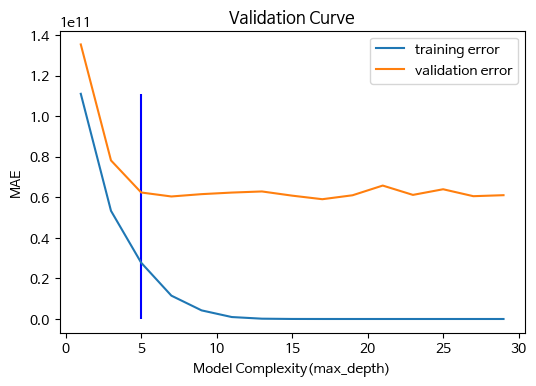

In [ ]:
# 검증곡선
import matplotlib.pyplot as plt
from category_encoders import OrdinalEncoder
from sklearn.model_selection import validation_curve
from sklearn.tree import DecisionTreeRegressor

pipe = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(), 
    DecisionTreeRegressor()
)

depth = range(1, 30, 2)
ts, vs = validation_curve(
    pipe, X_train, y_train
    , param_name='decisiontreeregressor__max_depth'
    , param_range=depth, scoring='neg_mean_absolute_error'
    , cv=6
    , n_jobs=-1
)

train_scores_mean = np.mean(-ts, axis=1)
validation_scores_mean = np.mean(-vs, axis=1)

fig, ax = plt.subplots()

# 훈련세트 검증곡선
ax.plot(depth, train_scores_mean, label='training error')

# 검증세트 검증곡선
ax.plot(depth, validation_scores_mean, label='validation error')

# 이상적인 max_depth
ax.vlines(5,0, train_scores_mean.max(), color='blue')

# 그래프 셋팅
ax.set(title='Validation Curve'
      , xlabel='Model Complexity(max_depth)', ylabel='MAE')
ax.legend()
fig.dpi = 100

In [ ]:
#랜덤포레스트에 RandomizedSearchCV적용
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

pipe = make_pipeline(
    TargetEncoder(), 
    SimpleImputer(), 
    RandomForestRegressor(random_state=2)
)

dists = {
    'targetencoder__smoothing': [2.,20.,50.,60.,100.,500.,1000.],
    'targetencoder__min_samples_leaf': randint(1, 10),     
    'simpleimputer__strategy': ['mean', 'median'], 
    'randomforestregressor__n_estimators': randint(50, 500), 
    'randomforestregressor__max_depth': [3, 5, 6, 7],
    'randomforestregressor__max_features': uniform(0, 1)
}

clf = RandomizedSearchCV(
    pipe,
    param_distributions=dists,
    n_iter=50,
    cv=6,
    scoring='neg_mean_absolute_error',
    verbose=1,
    n_jobs=-1
)

clf.fit(X_train, y_train);

/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:99: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


Fitting 6 folds for each of 50 candidates, totalling 300 fits


In [ ]:
print('최적 하이퍼파라미터: ', clf.best_params_)
print('MAE: ', -clf.best_score_)

최적 하이퍼파라미터:  {'randomforestregressor__max_depth': 7, 'randomforestregressor__max_features': 0.8322805296767202, 'randomforestregressor__n_estimators': 92, 'simpleimputer__strategy': 'mean', 'targetencoder__min_samples_leaf': 6, 'targetencoder__smoothing': 500.0}
MAE:  50579002334.244606


In [ ]:
pd.DataFrame(clf.cv_results_).sort_values(by='rank_test_score').T

,33,36,0,29,44,39,4,6,12,1,...,22,18,34,37,27,45,46,19,49,8
mean_fit_time,0.295362,0.243993,0.935106,0.878612,0.549278,0.819687,1.739641,1.906394,1.063837,2.042248,...,0.50647,0.856137,0.866096,0.260431,0.652776,0.715787,0.920616,0.923695,0.649482,0.496092
std_fit_time,0.008203,0.003621,0.14337,0.006177,0.011212,0.008744,0.175785,0.259955,0.008515,0.151502,...,0.011883,0.007766,0.010142,0.006299,0.019029,0.00784,0.007934,0.005595,0.010089,0.073168
mean_score_time,0.027193,0.024368,0.086898,0.061391,0.042962,0.061772,0.102384,0.171269,0.077272,0.143288,...,0.047552,0.064755,0.06902,0.02617,0.053571,0.063312,0.076007,0.072136,0.05343,0.056092
std_score_time,0.000797,0.00039,0.03983,0.00075,0.000979,0.002361,0.017178,0.043198,0.005819,0.029028,...,0.004977,0.000798,0.002462,0.000587,0.002852,0.002539,0.002185,0.000536,0.012771,0.017559
param_randomforestregressor__max_depth,7,7,7,7,6,6,7,7,6,7,...,5,3,3,3,3,3,3,3,3,3
param_randomforestregressor__max_features,0.832281,0.840856,0.923344,0.919764,0.908868,0.851101,0.543912,0.460324,0.891887,0.451846,...,0.071264,0.786145,0.969989,0.679329,0.596986,0.512049,0.387822,0.211328,0.303919,0.3001
param_randomforestregressor__n_estimators,92,69,207,348,212,334,317,409,442,491,...,217,392,391,85,288,329,443,446,302,93
param_simpleimputer__strategy,mean,mean,mean,mean,median,median,mean,mean,median,mean,...,median,median,median,median,median,mean,mean,mean,median,median
param_targetencoder__min_samples_leaf,6,2,5,2,9,5,3,6,2,3,...,4,9,4,4,8,1,2,3,3,6
param_targetencoder__smoothing,500.0,500.0,100.0,500.0,1000.0,500.0,500.0,50.0,100.0,500.0,...,20.0,1000.0,2.0,100.0,100.0,1000.0,100.0,20.0,2.0,20.0


In [ ]:
pipe = clf.best_estimator_

In [ ]:
pipe

Pipeline(steps=[('targetencoder',
                 TargetEncoder(cols=['Region', 'Animal species',
                                     'Production system', 'Commodity'],
                               min_samples_leaf=6, smoothing=500.0)),
                ('simpleimputer', SimpleImputer()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=7,
                                       max_features=0.8322805296767202,
                                       n_estimators=92, random_state=2))])

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

y_pred = pipe.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'테스트세트 MAE: {mae:,.0f}')
print(f'테스트세트 R2: {r2:,.3f}')

테스트세트 MAE: 48,434,378,398
테스트세트 R2: 0.582


기준모델 MAE: 139,490,814,013

# 모델 해석

In [ ]:
pipe.named_steps

{'randomforestregressor': RandomForestRegressor(max_depth=7, max_features=0.8322805296767202,
                       n_estimators=92, random_state=2),
 'simpleimputer': SimpleImputer(),
 'targetencoder': TargetEncoder(cols=['Region', 'Animal species', 'Production system',
                     'Commodity'],
               min_samples_leaf=6, smoothing=500.0)}

In [ ]:
# encoder, imputer를 preprocessing으로 묶었습니다. 후에 eli5 permutation 계산에 사용합니다
from sklearn.pipeline import Pipeline
pipe = Pipeline([
    ('preprocessing', make_pipeline(TargetEncoder(cols=['Region', 'Animal species', 'Production system', 'Commodity'], min_samples_leaf=8, smoothing=100.0), SimpleImputer())),
    ('rf', RandomForestRegressor(max_depth=7, max_features=0.8747782714833808, n_estimators=241, random_state=2, n_jobs=-1)) 
])

In [ ]:
pipe.named_steps

{'preprocessing': Pipeline(steps=[('targetencoder',
                  TargetEncoder(cols=['Region', 'Animal species',
                                      'Production system', 'Commodity'],
                                min_samples_leaf=8, smoothing=100.0)),
                 ('simpleimputer', SimpleImputer())]),
 'rf': RandomForestRegressor(max_depth=7, max_features=0.8747782714833808,
                       n_estimators=241, n_jobs=-1, random_state=2)}

In [ ]:
model = pipe.fit(X_train, y_train)
print('검증 정확도:', pipe.score(X_test, y_test))

검증 정확도: 0.6081817173809168


In [ ]:
pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

# permuter정의
permuter = PermutationImportance(
    pipe.named_steps['rf'], # model
    scoring='neg_mean_absolute_error', # metric
    n_iter=5, # 다른 random seed를 사용하여 5번 반복
    random_state=2
)

# permuter 계산
X_test_transformed = pipe.named_steps['preprocessing'].transform(X_test)
# 스코어 다시 계산
permuter.fit(X_test_transformed, y_test);

In [ ]:
feature_names = X_test.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values()

Production system          3.379952e+08
Commodity                  3.099681e+09
Region                     6.564409e+09
Animal species             1.357079e+10
Production (kg protein)    6.706697e+10
dtype: float64

In [ ]:
# 특성별 score 확인
eli5.show_weights(
    permuter, 
    top=None, #모든 특성 
    feature_names=feature_names # list 형식으로 넣어야 합니다
)

Weight,Feature
67066973093.8836 ± 10447073958.1131,Production (kg protein)
13570788987.4541 ± 16601932555.9717,Animal species
6564408772.9430 ± 11954152326.9640,Region
3099680946.2152 ± 927054811.5001,Commodity
337995211.1603 ± 2137311559.1868,Production system


In [ ]:
pip install pdpbox

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'Production (kg protein)'

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


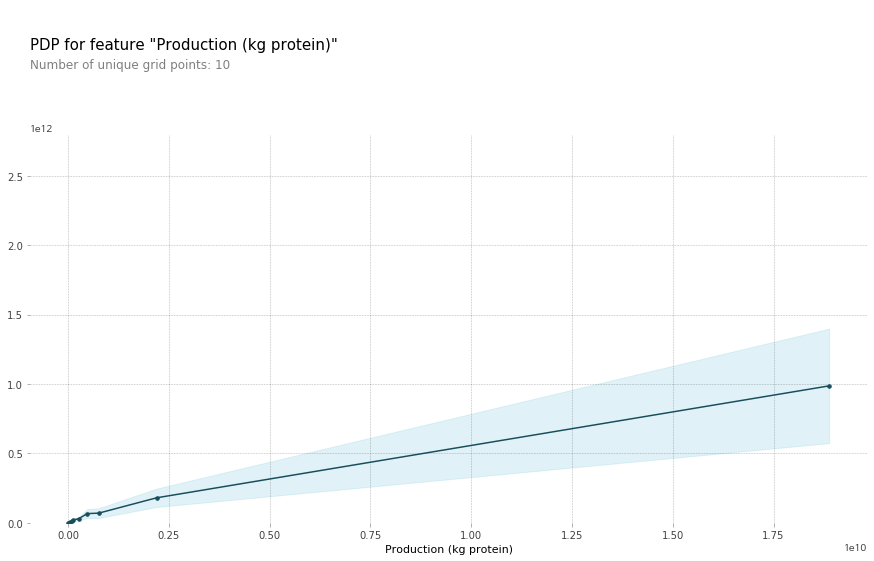

In [ ]:
isolated = pdp_isolate(
    model=pipe,
    dataset=X_test,
    model_features=X_test.columns,
    feature=feature
)
pdp_plot(isolated, feature_name=feature);